In [27]:
import torch
# from d2l import torch as d2l
from torch import nn
import matplotlib.pyplot as plt
import numpy as np

In [28]:
def corr2d(X, K):
    """
    计算二维互相关性
    X: 输入矩阵
    K: 卷积核
    """
    h, w = K.shape
    Y = torch.zeros((X.shape[0]-h+1), (X.shape[1]-w+1))
    for i in range(Y.shape[0]):
        for j in range(Y.shape[1]):
            Y[i, j] = (X[i:i+h, j:j+w]*K).sum()
    return Y

边缘检测

In [29]:
X = torch.ones((6, 8))
X[:, 2:6] = 0
X

tensor([[1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.]])

In [30]:
K = torch.ones((1, 2))
K[0,1]=-1
K

tensor([[ 1., -1.]])

In [31]:
Y = corr2d(X, K)
Y

tensor([[ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.]])

对卷积核进行学习

In [32]:
# 创建单层输入单层输出的1*2卷积核网络，通过人为计算的Y对卷积核进行学习
net = nn.Conv2d(1, 1, kernel_size=(1,2), bias=False)
X = X.reshape(1, 1, 6, 8)
Y = Y.reshape(1, 1, 6, 7)

loss = nn.MSELoss()
trainer = torch.optim.SGD(net.parameters(), lr=0.1)


epoch5, loss=0.14891164004802704
epoch10, loss=0.0836213231086731
epoch15, loss=0.05662396922707558
epoch20, loss=0.04110029712319374
epoch25, loss=0.03048483468592167
epoch30, loss=0.022755129262804985
epoch35, loss=0.01701645366847515
epoch40, loss=0.012731701135635376
epoch45, loss=0.009527281858026981
epoch50, loss=0.007129687815904617
epoch55, loss=0.005335523281246424
epoch60, loss=0.003992870450019836
epoch65, loss=0.002988089807331562
epoch70, loss=0.0022361581213772297
epoch75, loss=0.0016734448727220297
epoch80, loss=0.001252332585863769
epoch85, loss=0.0009371911291964352
epoch90, loss=0.0007013530121184886
epoch95, loss=0.000524862960446626
epoch100, loss=0.0003927841316908598


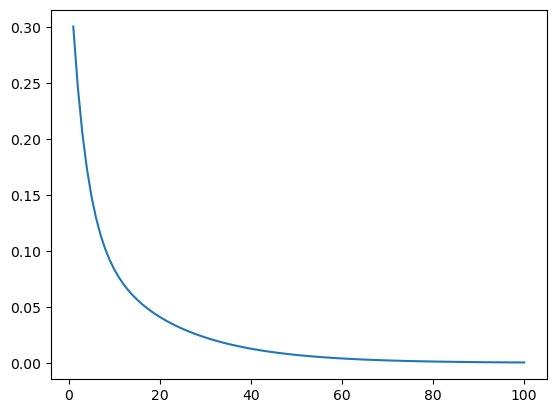

In [33]:
num_epochs = 100

epoch_list = np.ones([num_epochs])
loss_list = np.ones([num_epochs])

for i in range(num_epochs):
    l = loss(net(X), Y)
    trainer.zero_grad()
    l.backward()
    trainer.step()
    epoch_list[i] = i+1
    loss_list[i] = l

    if (i+1)%5 == 0:
        print(f'epoch{i+1}, loss={l.sum()}')

plt.plot(epoch_list, loss_list, label='Loss')

In [34]:
net.state_dict()

OrderedDict([('weight', tensor([[[[ 0.9640, -0.9640]]]]))])